# Daily Temperature Prediction of Chennai

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
from tqdm import tqdm

In [59]:
chennai_temp = pd.read_csv(r"C:\Users\ayush\Downloads\ChennaiTempPrediction\chennai_temp.csv")
print(chennai_temp.shape,"\n")
print(chennai_temp.head())
print(chennai_temp.tail())


(12683, 5) 

         time  tavg   tmin  tmax  prcp
0  1990-01-01  25.2  22.80  28.4   0.5
1  1990-01-02  24.9  21.70  29.1   0.0
2  1990-01-03  25.6  21.40  29.8   0.0
3  1990-01-04  25.7  21.05  28.7   0.0
4  1990-01-05  25.5  20.70  28.4   0.0
             time  tavg  tmin  tmax  prcp
12678  2024-09-17  32.5  29.0  38.0   0.1
12679  2024-09-18  32.0  29.0  36.0   1.5
12680  2024-09-19  30.8  28.0  34.0   0.9
12681  2024-09-20  32.2  29.0  38.0   0.3
12682  2024-09-21  28.9  26.0  34.0   4.5


In [60]:
duplicates = chennai_temp[chennai_temp.index.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [time, tavg, tmin, tmax, prcp]
Index: []


In [61]:
# Ensure the 'time' column is of string type
chennai_temp['time'] = chennai_temp['time'].astype(str)

#----------------------------------------------------------------------------------------------

# Check for dates in dd/mm/yyyy format
mask_dd_mm_yyyy = chennai_temp['time'].str.match(r'^\d{2}/\d{2}/\d{4}$')
print("Dates in dd/mm/yyyy format:")
print(chennai_temp[mask_dd_mm_yyyy])

# Convert dates from dd/mm/yyyy to dd-mm-yyyy
chennai_temp.loc[mask_dd_mm_yyyy, 'time'] = (
    pd.to_datetime(chennai_temp.loc[mask_dd_mm_yyyy, 'time'], format='%d/%m/%Y')
    .dt.strftime('%d-%m-%Y')
)
print(chennai_temp[mask_dd_mm_yyyy])

# Optional: Check for any NaT values after conversion
if chennai_temp['time'].isnull().any():
    print("Some dates could not be converted:")
    print(chennai_temp[chennai_temp['time'].isnull()])

# ----------------------------------------------------------------------------------------------------

# Check for dates in dd/mm/yyyy format
mask_dd_mm_yyyy = chennai_temp['time'].str.match(r'^\d{2}/\d{1}/\d{4}$')
print("Dates in dd/mm/yyyy format:")
print(chennai_temp[mask_dd_mm_yyyy])

# Convert dates from dd/mm/yyyy to dd-mm-yyyy
chennai_temp.loc[mask_dd_mm_yyyy, 'time'] = (
    pd.to_datetime(chennai_temp.loc[mask_dd_mm_yyyy, 'time'], format='%d/%m/%Y')
    .dt.strftime('%d-%m-%Y')
)
print(chennai_temp[mask_dd_mm_yyyy])

# Optional: Check for any NaT values after conversion
if chennai_temp['time'].isnull().any():
    print("Some dates could not be converted:")
    print(chennai_temp[chennai_temp['time'].isnull()])

# ------------------------------------------------------------------------------------------------------------------

# Check for dates in dd/mm/yyyy format
mask_dd_mm_yyyy = chennai_temp['time'].str.match(r'^\d{1}/\d{1}/\d{4}$')
print("Dates in dd/mm/yyyy format:")
print(chennai_temp[mask_dd_mm_yyyy])

# Convert dates from dd/mm/yyyy to dd-mm-yyyy
chennai_temp.loc[mask_dd_mm_yyyy, 'time'] = (
    pd.to_datetime(chennai_temp.loc[mask_dd_mm_yyyy, 'time'], format='%d/%m/%Y')
    .dt.strftime('%d-%m-%Y')
)
print(chennai_temp[mask_dd_mm_yyyy])

# Optional: Check for any NaT values after conversion
if chennai_temp['time'].isnull().any():
    print("Some dates could not be converted:")
    print(chennai_temp[chennai_temp['time'].isnull()])

# ------------------------------------------------------------------------------------------------------------------------

# Check for dates in dd/mm/yyyy format
mask_dd_mm_yyyy = chennai_temp['time'].str.match(r'^\d{1}/\d{2}/\d{4}$')
print("Dates in dd/mm/yyyy format:")
print(chennai_temp[mask_dd_mm_yyyy])

# Convert dates from dd/mm/yyyy to dd-mm-yyyy
chennai_temp.loc[mask_dd_mm_yyyy, 'time'] = (
    pd.to_datetime(chennai_temp.loc[mask_dd_mm_yyyy, 'time'], format='%d/%m/%Y')
    .dt.strftime('%d-%m-%Y')
)
print(chennai_temp[mask_dd_mm_yyyy])

# Optional: Check for any NaT values after conversion
if chennai_temp['time'].isnull().any():
    print("Some dates could not be converted:")
    print(chennai_temp[chennai_temp['time'].isnull()])

Dates in dd/mm/yyyy format:
Empty DataFrame
Columns: [time, tavg, tmin, tmax, prcp]
Index: []
Empty DataFrame
Columns: [time, tavg, tmin, tmax, prcp]
Index: []
Dates in dd/mm/yyyy format:
Empty DataFrame
Columns: [time, tavg, tmin, tmax, prcp]
Index: []
Empty DataFrame
Columns: [time, tavg, tmin, tmax, prcp]
Index: []
Dates in dd/mm/yyyy format:
Empty DataFrame
Columns: [time, tavg, tmin, tmax, prcp]
Index: []
Empty DataFrame
Columns: [time, tavg, tmin, tmax, prcp]
Index: []
Dates in dd/mm/yyyy format:
Empty DataFrame
Columns: [time, tavg, tmin, tmax, prcp]
Index: []
Empty DataFrame
Columns: [time, tavg, tmin, tmax, prcp]
Index: []


In [62]:
print(chennai_temp.head)

<bound method NDFrame.head of              time  tavg   tmin  tmax  prcp
0      1990-01-01  25.2  22.80  28.4   0.5
1      1990-01-02  24.9  21.70  29.1   0.0
2      1990-01-03  25.6  21.40  29.8   0.0
3      1990-01-04  25.7  21.05  28.7   0.0
4      1990-01-05  25.5  20.70  28.4   0.0
...           ...   ...    ...   ...   ...
12678  2024-09-17  32.5  29.00  38.0   0.1
12679  2024-09-18  32.0  29.00  36.0   1.5
12680  2024-09-19  30.8  28.00  34.0   0.9
12681  2024-09-20  32.2  29.00  38.0   0.3
12682  2024-09-21  28.9  26.00  34.0   4.5

[12683 rows x 5 columns]>


In [63]:
# Convert the 'time' column to datetime, allowing pandas to infer the format
chennai_temp['time'] = pd.to_datetime(chennai_temp['time'], errors='coerce')

# Set the 'time' column as the index
chennai_temp.set_index('time', inplace=True)

# Display the first few rows of the DataFrame
print(chennai_temp.head())


            tavg   tmin  tmax  prcp
time                               
1990-01-01  25.2  22.80  28.4   0.5
1990-01-02  24.9  21.70  29.1   0.0
1990-01-03  25.6  21.40  29.8   0.0
1990-01-04  25.7  21.05  28.7   0.0
1990-01-05  25.5  20.70  28.4   0.0


In [64]:
print('\nUnique dates in our data: ', len(chennai_temp.index.unique()), 'Days')
print(chennai_temp.index.max())
print(chennai_temp.index.min())
our_date_range =  chennai_temp.index.max() - chennai_temp.index.min() 

# Calculate number of days in date range
print('Total days in our date range:', our_date_range.days + 1, 'Days')
#date_range = pd.date_range(min(sales.index), max(sales.index))


Unique dates in our data:  12683 Days
2024-09-21 00:00:00
1990-01-01 00:00:00
Total days in our date range: 12683 Days


In [65]:
# finding summary of NA values
missing_count = chennai_temp.isna().sum()
print(missing_count)
print(chennai_temp.index.isna().sum())

tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64
0


In [66]:
# printing missing values
rows_with_missing = chennai_temp[chennai_temp.isna().any(axis=1)]
print(rows_with_missing)

Empty DataFrame
Columns: [tavg, tmin, tmax, prcp]
Index: []


In [67]:
# Interpolate NaN values using cubic polynomial interpolation
chennai_temp['tavg'] = chennai_temp['tavg'].interpolate(method='polynomial', order=1)
chennai_temp['tmin'] = chennai_temp['tmin'].interpolate(method='polynomial', order=1)
chennai_temp['tmax'] = chennai_temp['tmax'].interpolate(method='polynomial', order=1)
chennai_temp['prcp'] = chennai_temp['prcp'].interpolate(method='polynomial', order=1)

chennai_temp.to_csv(r"C:\Users\ayush\Downloads\ChennaiTempPrediction\chennai_temp_interpolated.csv", index=True)

In [68]:
# finding summary of NA values
missing_count = chennai_temp.isna().sum()
print(missing_count)
print(chennai_temp.index.isna().sum())

tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64
0


In [69]:
chennai_temp.index  = chennai_temp.index. astype('datetime64[ns]')
chennai_temp['date_Int'] = chennai_temp.index .astype(np.int64) * 1e-9
chennai_temp['Day'] = chennai_temp.index.day
chennai_temp['Month'] = chennai_temp.index.month
chennai_temp['Year'] = chennai_temp.index.year         
chennai_temp['DayOfWeek'] = chennai_temp.index.dayofweek
chennai_temp['DayOfYear'] = chennai_temp.index.dayofyear
chennai_temp['WeekOfYear'] = chennai_temp.index.isocalendar().week
chennai_temp['Quarter'] = chennai_temp.index.quarter   

In [70]:
print(chennai_temp.shape,"\n")
chennai_temp.head()

(12683, 12) 



,tavg,tmin,tmax,prcp,date_Int,Day,Month,Year,DayOfWeek,DayOfYear,WeekOfYear,Quarter
time,,,,,,,,,,,,
1990-01-01,25.2,22.80,28.4,0.5,631152000.0,1,1,1990,0,1,1,1
1990-01-02,24.9,21.70,29.1,0.0,631238400.0,2,1,1990,1,2,1,1
1990-01-03,25.6,21.40,29.8,0.0,631324800.0,3,1,1990,2,3,1,1
1990-01-04,25.7,21.05,28.7,0.0,631411200.0,4,1,1990,3,4,1,1
1990-01-05,25.5,20.70,28.4,0.0,631497600.0,5,1,1990,4,5,1,1


In [71]:
chennai_temp.tail()

,tavg,tmin,tmax,prcp,date_Int,Day,Month,Year,DayOfWeek,DayOfYear,WeekOfYear,Quarter
time,,,,,,,,,,,,
2024-09-17,32.5,29.0,38.0,0.1,1.726531e+09,17,9,2024,1,261,38,3
2024-09-18,32.0,29.0,36.0,1.5,1.726618e+09,18,9,2024,2,262,38,3
2024-09-19,30.8,28.0,34.0,0.9,1.726704e+09,19,9,2024,3,263,38,3
2024-09-20,32.2,29.0,38.0,0.3,1.726790e+09,20,9,2024,4,264,38,3
2024-09-21,28.9,26.0,34.0,4.5,1.726877e+09,21,9,2024,5,265,38,3


In [72]:
temp_daily = chennai_temp.resample('D').mean()
print('Daily temperature')
print(temp_daily.head(), '\n')
print(temp_daily.shape,"\n")

temp_weekly = chennai_temp.resample('W').mean()
print('Weekly temperature')
print(temp_weekly.head(), '\n')
print(temp_weekly.shape,"\n")

temp_monthly = chennai_temp.resample('M').mean()
print('Monthly temperature')
print(temp_monthly.head(), '\n')
print(temp_monthly.shape,"\n")

temp_quaterly = chennai_temp.resample('Q').mean()
print('Quaterly temperature')
print(temp_quaterly.head(), '\n')
print(temp_quaterly.shape,"\n")

temp_yearly = chennai_temp.resample('Y').mean()
print('Yearly temperature')
print(temp_yearly.head(), '\n')
print(temp_yearly.shape,"\n")



Daily temperature
            tavg   tmin  tmax  prcp     date_Int  Day  Month    Year  \
time                                                                   
1990-01-01  25.2  22.80  28.4   0.5  631152000.0  1.0    1.0  1990.0   
1990-01-02  24.9  21.70  29.1   0.0  631238400.0  2.0    1.0  1990.0   
1990-01-03  25.6  21.40  29.8   0.0  631324800.0  3.0    1.0  1990.0   
1990-01-04  25.7  21.05  28.7   0.0  631411200.0  4.0    1.0  1990.0   
1990-01-05  25.5  20.70  28.4   0.0  631497600.0  5.0    1.0  1990.0   

            DayOfWeek  DayOfYear  WeekOfYear  Quarter  
time                                                   
1990-01-01        0.0        1.0         1.0      1.0  
1990-01-02        1.0        2.0         1.0      1.0  
1990-01-03        2.0        3.0         1.0      1.0  
1990-01-04        3.0        4.0         1.0      1.0  
1990-01-05        4.0        5.0         1.0      1.0   

(12683, 12) 

Weekly temperature
                 tavg       tmin       tmax      p

C:\Users\ayush\AppData\Local\Temp\ipykernel_18736\3884734972.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_monthly = chennai_temp.resample('M').mean()
C:\Users\ayush\AppData\Local\Temp\ipykernel_18736\3884734972.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  temp_quaterly = chennai_temp.resample('Q').mean()
C:\Users\ayush\AppData\Local\Temp\ipykernel_18736\3884734972.py:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  temp_yearly = chennai_temp.resample('Y').mean()


## Methods for potting 

In [73]:
def temperature_plot(temp,string):

    plt.figure(figsize=(12, 6))

    # Fill area between tmax and tmin
    plt.fill_between(temp.index, temp['tmax'], temp['tmin'], color='lightblue', alpha=0.5)

    # Plot tavg, tmin, and tmax
    plt.plot(temp.index, temp['tavg'], label='Average Temperature (tavg)', color='orange', marker='o')
    plt.plot(temp.index, temp['tmin'], label='Minimum Temperature (tmin)', color='blue', linestyle='--')
    plt.plot(temp.index, temp['tmax'], label='Maximum Temperature (tmax)', color='red', linestyle='--')

    # Add titles and labels
    title = 'Temperature Variation in Chennai ' + string
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid()

    # Show plot
    plt.show()

    return

def precipitation_plot(temp, string):
    plt.figure(figsize=(12, 6))
    n = 0
    if string == "Daily":
        n = 1
    elif string == "weekly":
        n = 7
    elif string == "monthly":
        n = 30
    elif string == "quaterly":
        n = 91
    else:
        n = 365


    # plotting prcp with dashed line style
    plt.plot(temp.index, temp["prcp"] * n , label='Average Precipitation in cm (prcp)', 
             color='blue', linestyle='--')  # Change `marker` to `linestyle`

    # Add titles and labels
    title = 'Precipitation Variation in Chennai ' + string
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Centimeters')
    plt.legend()
    plt.grid()

    # Show plot
    plt.show()


    


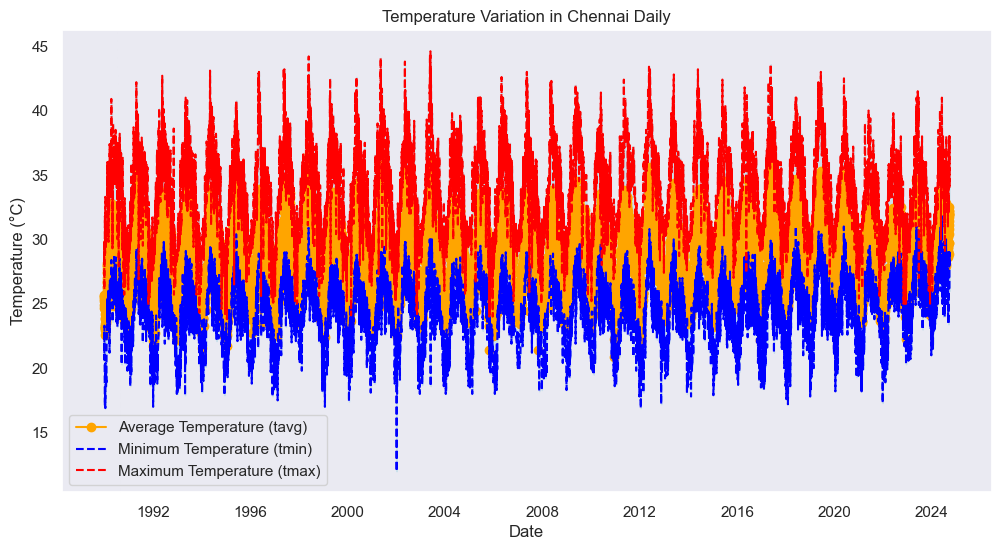

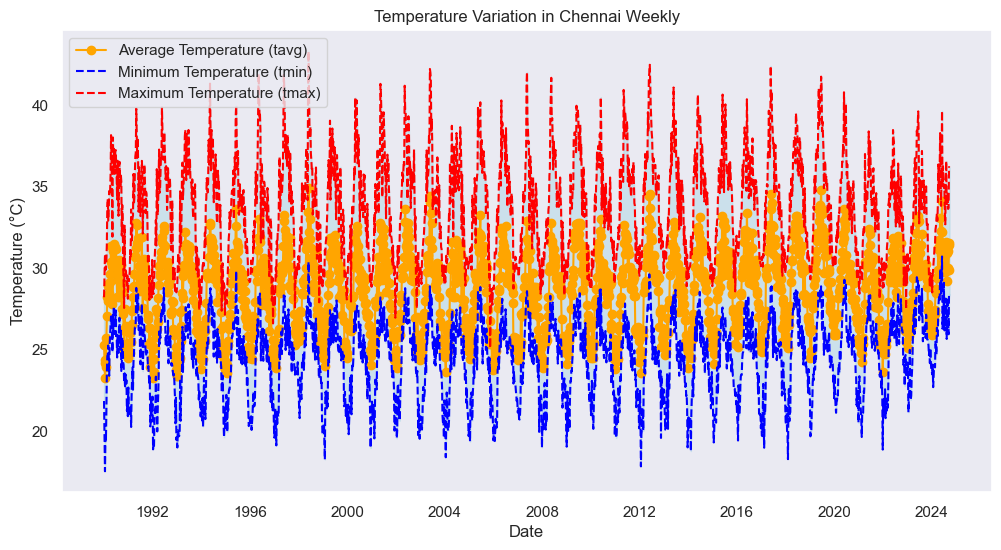

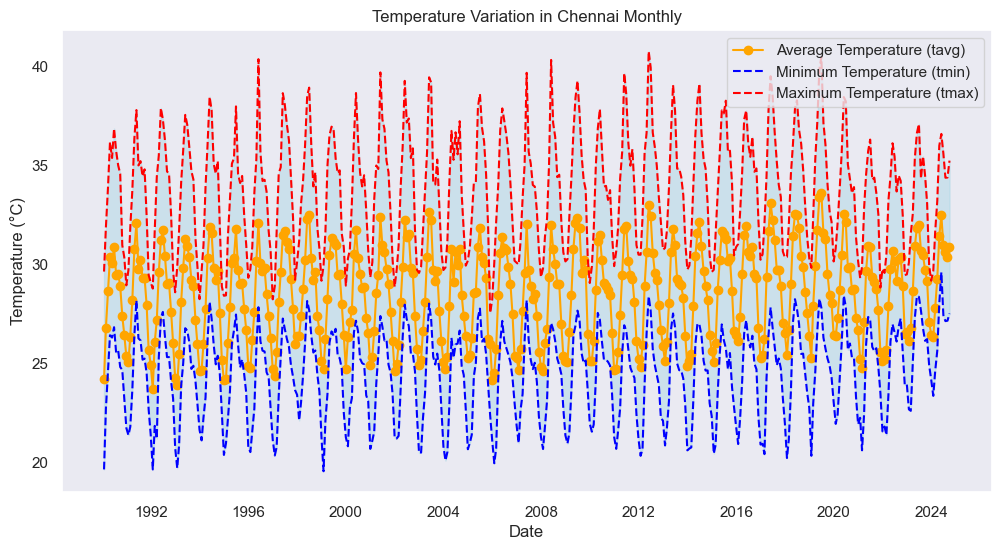

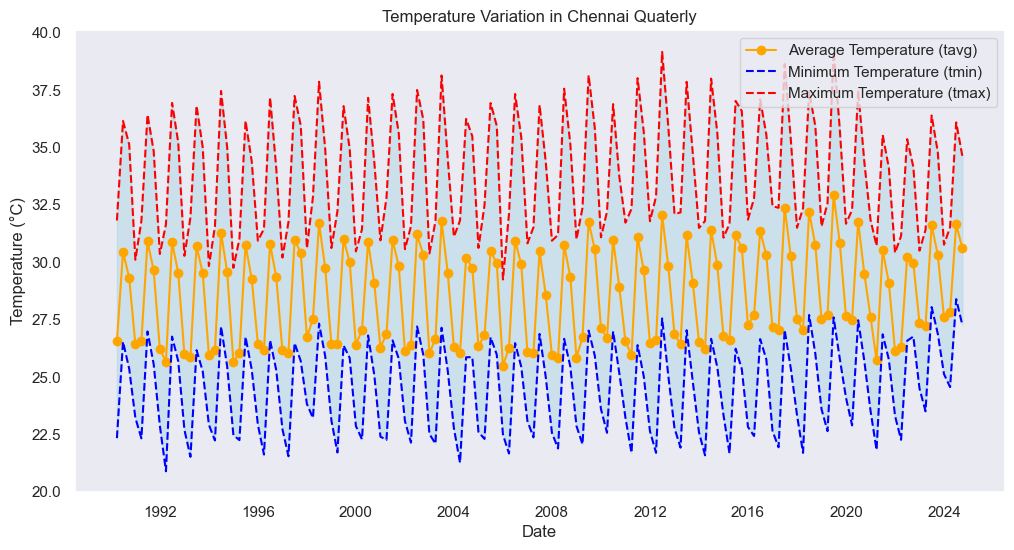

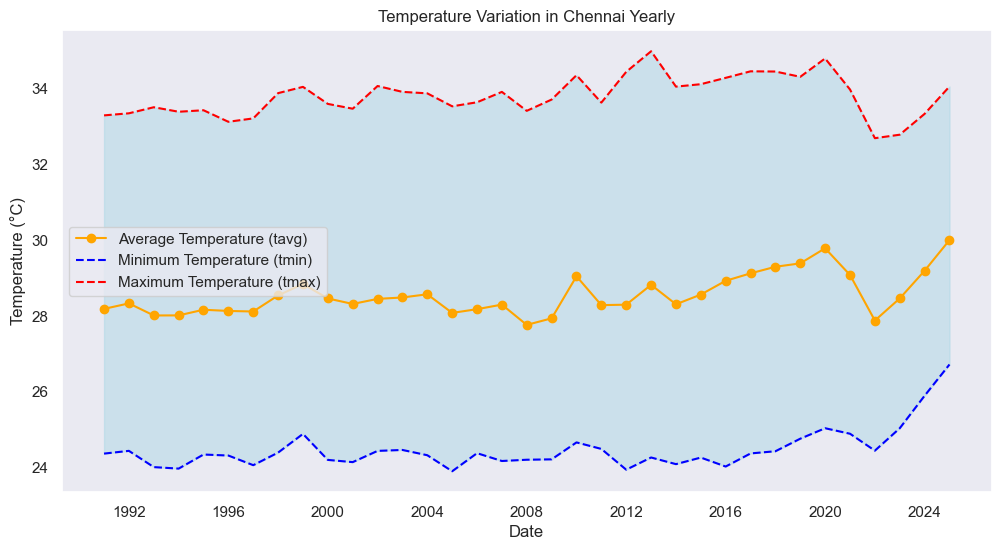

In [74]:
temperature_plot(temp_daily, "Daily")
temperature_plot(temp_weekly, "Weekly")
temperature_plot(temp_monthly, "Monthly")
temperature_plot(temp_quaterly, "Quaterly")
temperature_plot(temp_yearly, "Yearly")

# prediction 

In [75]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [76]:
def predicted_temperature_plot(temp,string):

    plt.figure(figsize=(12, 6))

    # Fill area between tmax and tmin
    #plt.fill_between(temp.index, temp['tmax'], temp['tmin'], color='lightblue', alpha=0.5)

    # Plot tavg, tmin, and tmax
    plt.plot(temp.index, temp['tavg'], label='Average Temperature (tavg)', color='lightgreen', linestyle='--')
    plt.plot(temp.index, temp['tmin'], label='Minimum Temperature (tmin)', color='lightblue', linestyle='--')
    plt.plot(temp.index, temp['tmax'], label='Maximum Temperature (tmax)', color='yellow', linestyle='--')

    plt.plot(temp.index, temp['p_tavg'], label='Predicted Average Temperature (tavg)', color='black', linestyle='-')
    plt.plot(temp.index, temp['p_tmin'], label='Predicted Minimum Temperature (tmin)', color='darkblue', linestyle='-')
    plt.plot(temp.index, temp['p_tmax'], label='Predicted Maximum Temperature (tmax)', color='red', linestyle='-')

    # Add titles and labels
    title = 'Temperature Variation in Chennai Real and Predicted' + string
    plt.title(title)    
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid()

    # Show plot
    plt.show()
    return

In [77]:
def predicted_precipitation_plot(temp, string):
    plt.figure(figsize=(12, 6))
    n = 0
    if string == "Daily":
        n = 1
    elif string == "weekly":
        n = 7
    elif string == "monthly":
        n = 30
    elif string == "quaterly":
        n = 91
    else:
        n = 365


    # plotting prcp with dashed line style
    plt.plot(temp.index, temp["p_prcp"] * n , label='Predicted Average Precipitation in cm (prcp)', 
             color='blue', linestyle='-')  
    plt.plot(temp.index, temp["prcp"] * n , label='Average Precipitation in cm (prcp)', 
             color='yellow', linestyle='--')  # Change `marker` to `linestyle`

    # Add titles and labels
    title = 'Precipitation Variation in Chennai Real and Predicted' + string
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Centimeters')
    plt.legend()
    plt.grid()

    # Show plot
    plt.show()

In [78]:
#Plot the Features Importances
def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    plt.title('Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('importances-01.png')
    plt.show()
    sns.set()

In [79]:

# Select the last 100 days for the test set
test_df = temp_daily.tail(500)
test_df1 = test_df.copy()
# Select the remaining data for the training set
train_df = temp_daily.iloc[:-500]
train_df1 = train_df.copy()

# Check the shapes of the resulting datasets
print("Training set size:", train_df.shape,"\n")
print("Training set:", train_df.head,"\n")

print("Testing set size:", test_df.shape,"\n")
print("Testing set :", test_df.head)


Training set size: (12183, 12) 

Training set: <bound method NDFrame.head of             tavg   tmin  tmax  prcp      date_Int   Day  Month    Year  \
time                                                                     
1990-01-01  25.2  22.80  28.4   0.5  6.311520e+08   1.0    1.0  1990.0   
1990-01-02  24.9  21.70  29.1   0.0  6.312384e+08   2.0    1.0  1990.0   
1990-01-03  25.6  21.40  29.8   0.0  6.313248e+08   3.0    1.0  1990.0   
1990-01-04  25.7  21.05  28.7   0.0  6.314112e+08   4.0    1.0  1990.0   
1990-01-05  25.5  20.70  28.4   0.0  6.314976e+08   5.0    1.0  1990.0   
...          ...    ...   ...   ...           ...   ...    ...     ...   
2023-05-06  29.6  26.40  33.3   0.0  1.683331e+09   6.0    5.0  2023.0   
2023-05-07  30.1  27.00  35.0   0.3  1.683418e+09   7.0    5.0  2023.0   
2023-05-08  30.2  26.00  34.4   0.0  1.683504e+09   8.0    5.0  2023.0   
2023-05-09  31.4  27.40  35.0   0.0  1.683590e+09   9.0    5.0  2023.0   
2023-05-10  31.8  28.90  36.0   0.0

In [80]:
train_df.index = train_df.index.astype('datetime64[ns]')
test_df.index  = test_df.index.astype('datetime64[ns]')
for dataset in (train_df,test_df):
    dataset['date_Int'] = dataset.index .astype(np.int64) * 1e-9
    dataset['Day'] = dataset.index.day
    dataset['Month'] = dataset.index.month
    dataset['Year'] = dataset.index.year         
    dataset['DayOfWeek'] = dataset.index.dayofweek
    dataset['DayOfYear'] = dataset.index.dayofyear
    dataset['WeekOfYear'] = dataset.index.isocalendar().week
    dataset['Quarter'] = dataset.index.quarter
    

C:\Users\ayush\AppData\Local\Temp\ipykernel_18736\2521362353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date_Int'] = dataset.index .astype(np.int64) * 1e-9
C:\Users\ayush\AppData\Local\Temp\ipykernel_18736\2521362353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Day'] = dataset.index.day
C:\Users\ayush\AppData\Local\Temp\ipykernel_18736\2521362353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [81]:
test_df.tail()

,tavg,tmin,tmax,prcp,date_Int,Day,Month,Year,DayOfWeek,DayOfYear,WeekOfYear,Quarter
time,,,,,,,,,,,,
2024-09-17,32.5,29.0,38.0,0.1,1.726531e+09,17,9,2024,1,261,38,3
2024-09-18,32.0,29.0,36.0,1.5,1.726618e+09,18,9,2024,2,262,38,3
2024-09-19,30.8,28.0,34.0,0.9,1.726704e+09,19,9,2024,3,263,38,3
2024-09-20,32.2,29.0,38.0,0.3,1.726790e+09,20,9,2024,4,264,38,3
2024-09-21,28.9,26.0,34.0,4.5,1.726877e+09,21,9,2024,5,265,38,3


In [82]:
train_df.head()

,tavg,tmin,tmax,prcp,date_Int,Day,Month,Year,DayOfWeek,DayOfYear,WeekOfYear,Quarter
time,,,,,,,,,,,,
1990-01-01,25.2,22.80,28.4,0.5,631152000.0,1,1,1990,0,1,1,1
1990-01-02,24.9,21.70,29.1,0.0,631238400.0,2,1,1990,1,2,1,1
1990-01-03,25.6,21.40,29.8,0.0,631324800.0,3,1,1990,2,3,1,1
1990-01-04,25.7,21.05,28.7,0.0,631411200.0,4,1,1990,3,4,1,1
1990-01-05,25.5,20.70,28.4,0.0,631497600.0,5,1,1990,4,5,1,1


<Axes: xlabel='tavg', ylabel='Count'>

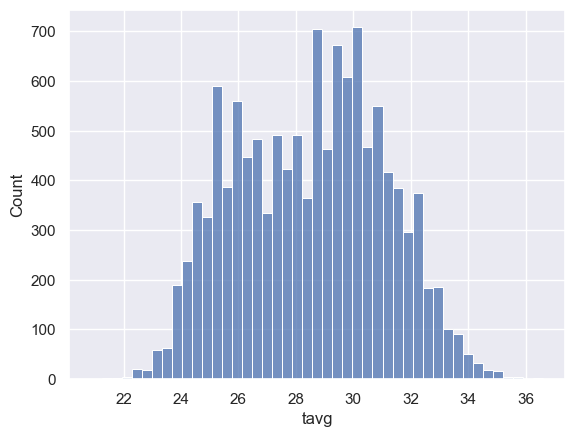

In [83]:
#Target Histogram
sns.histplot(train_df['tavg'])

# Lags for target


In [84]:
df = pd.concat([train_df,test_df])
feat = 'tavg'
for window in [365,730,1095]:
    df[f'{feat}_Lag_{window}'] = df[feat].shift(window)
    df[f'{feat}_Dif_{window}'] = df[feat].diff(window)

train_df = df[:train_df.shape[0]]
test_df = df[train_df.shape[0]:]

print(type(test_df1))

<class 'pandas.core.frame.DataFrame'>


### Add Aggregations based on time with target

In [85]:
def Agg(Feature):
    for dataset in (train_df,test_df):
        for feat_1 in ['Year','Month','WeekOfYear','Day']:
            dataset[f'{Feature}_Agg_{feat_1}_mean'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].mean()))
            dataset[f'{Feature}_Agg_{feat_1}_median'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].median()))
            dataset[f'{Feature}_Agg_{feat_1}_std'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].std()))
            dataset[f'{Feature}_Agg_{feat_1}_min'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].min()))
            dataset[f'{Feature}_Agg_{feat_1}_max'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].max()))
            dataset[f'{Feature}_Agg_{feat_1}_sum'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].sum()))
            dataset[f'{Feature}_Agg_{feat_1}_range'] = dataset[f'{Feature}_Agg_{feat_1}_max'] - dataset[f'{Feature}_Agg_{feat_1}_min']
            dataset[f'{Feature}_Agg_{feat_1}_var'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].var()))
            dataset[f'{Feature}_Agg_{feat_1}_skew'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].skew()))
            for n in [0.10,0.25,0.75,0.90]:
                dataset[f'{Feature}_Agg_{feat_1}_quantile_{n}'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].quantile(n)))        
feats = ['tavg']
for feat in feats:         
    Agg(feat)

C:\Users\ayush\AppData\Local\Temp\ipykernel_18736\908060051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f'{Feature}_Agg_{feat_1}_mean'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].mean()))
C:\Users\ayush\AppData\Local\Temp\ipykernel_18736\908060051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f'{Feature}_Agg_{feat_1}_median'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].median()))
C:\Users\ayush\AppData\Local\Temp\ipykernel_18736\908060051.py:6

## 01. Modelling by LGBMRegressor

In [86]:
from lightgbm import LGBMRegressor, LGBMClassifier
lgbm = LGBMRegressor(max_depth=6, random_state=42)

## Validation

In [87]:
print('Validating...')

X = train_df.drop('tavg',axis=1).values
y = train_df['tavg'].values


scores = []
for train_index, test_index in TimeSeriesSplit(n_splits=4).split(X, y):
    X_Train, X_Test = X[train_index], X[test_index]
    y_Train, y_Test = y[train_index], y[test_index]
    lgbm.fit(X_Train,y_Train)
    y_pred = lgbm.predict(X_Test)
    scores.append(mean_absolute_error(y_Test,y_pred))
    print(scores[-1])
    
print("\nMean:",np.mean(scores),"\nSTD: ", np.std(scores))

Validating...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 2439, number of used features: 69
[LightGBM] [Info] Start training from score 28.209266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

# features importance

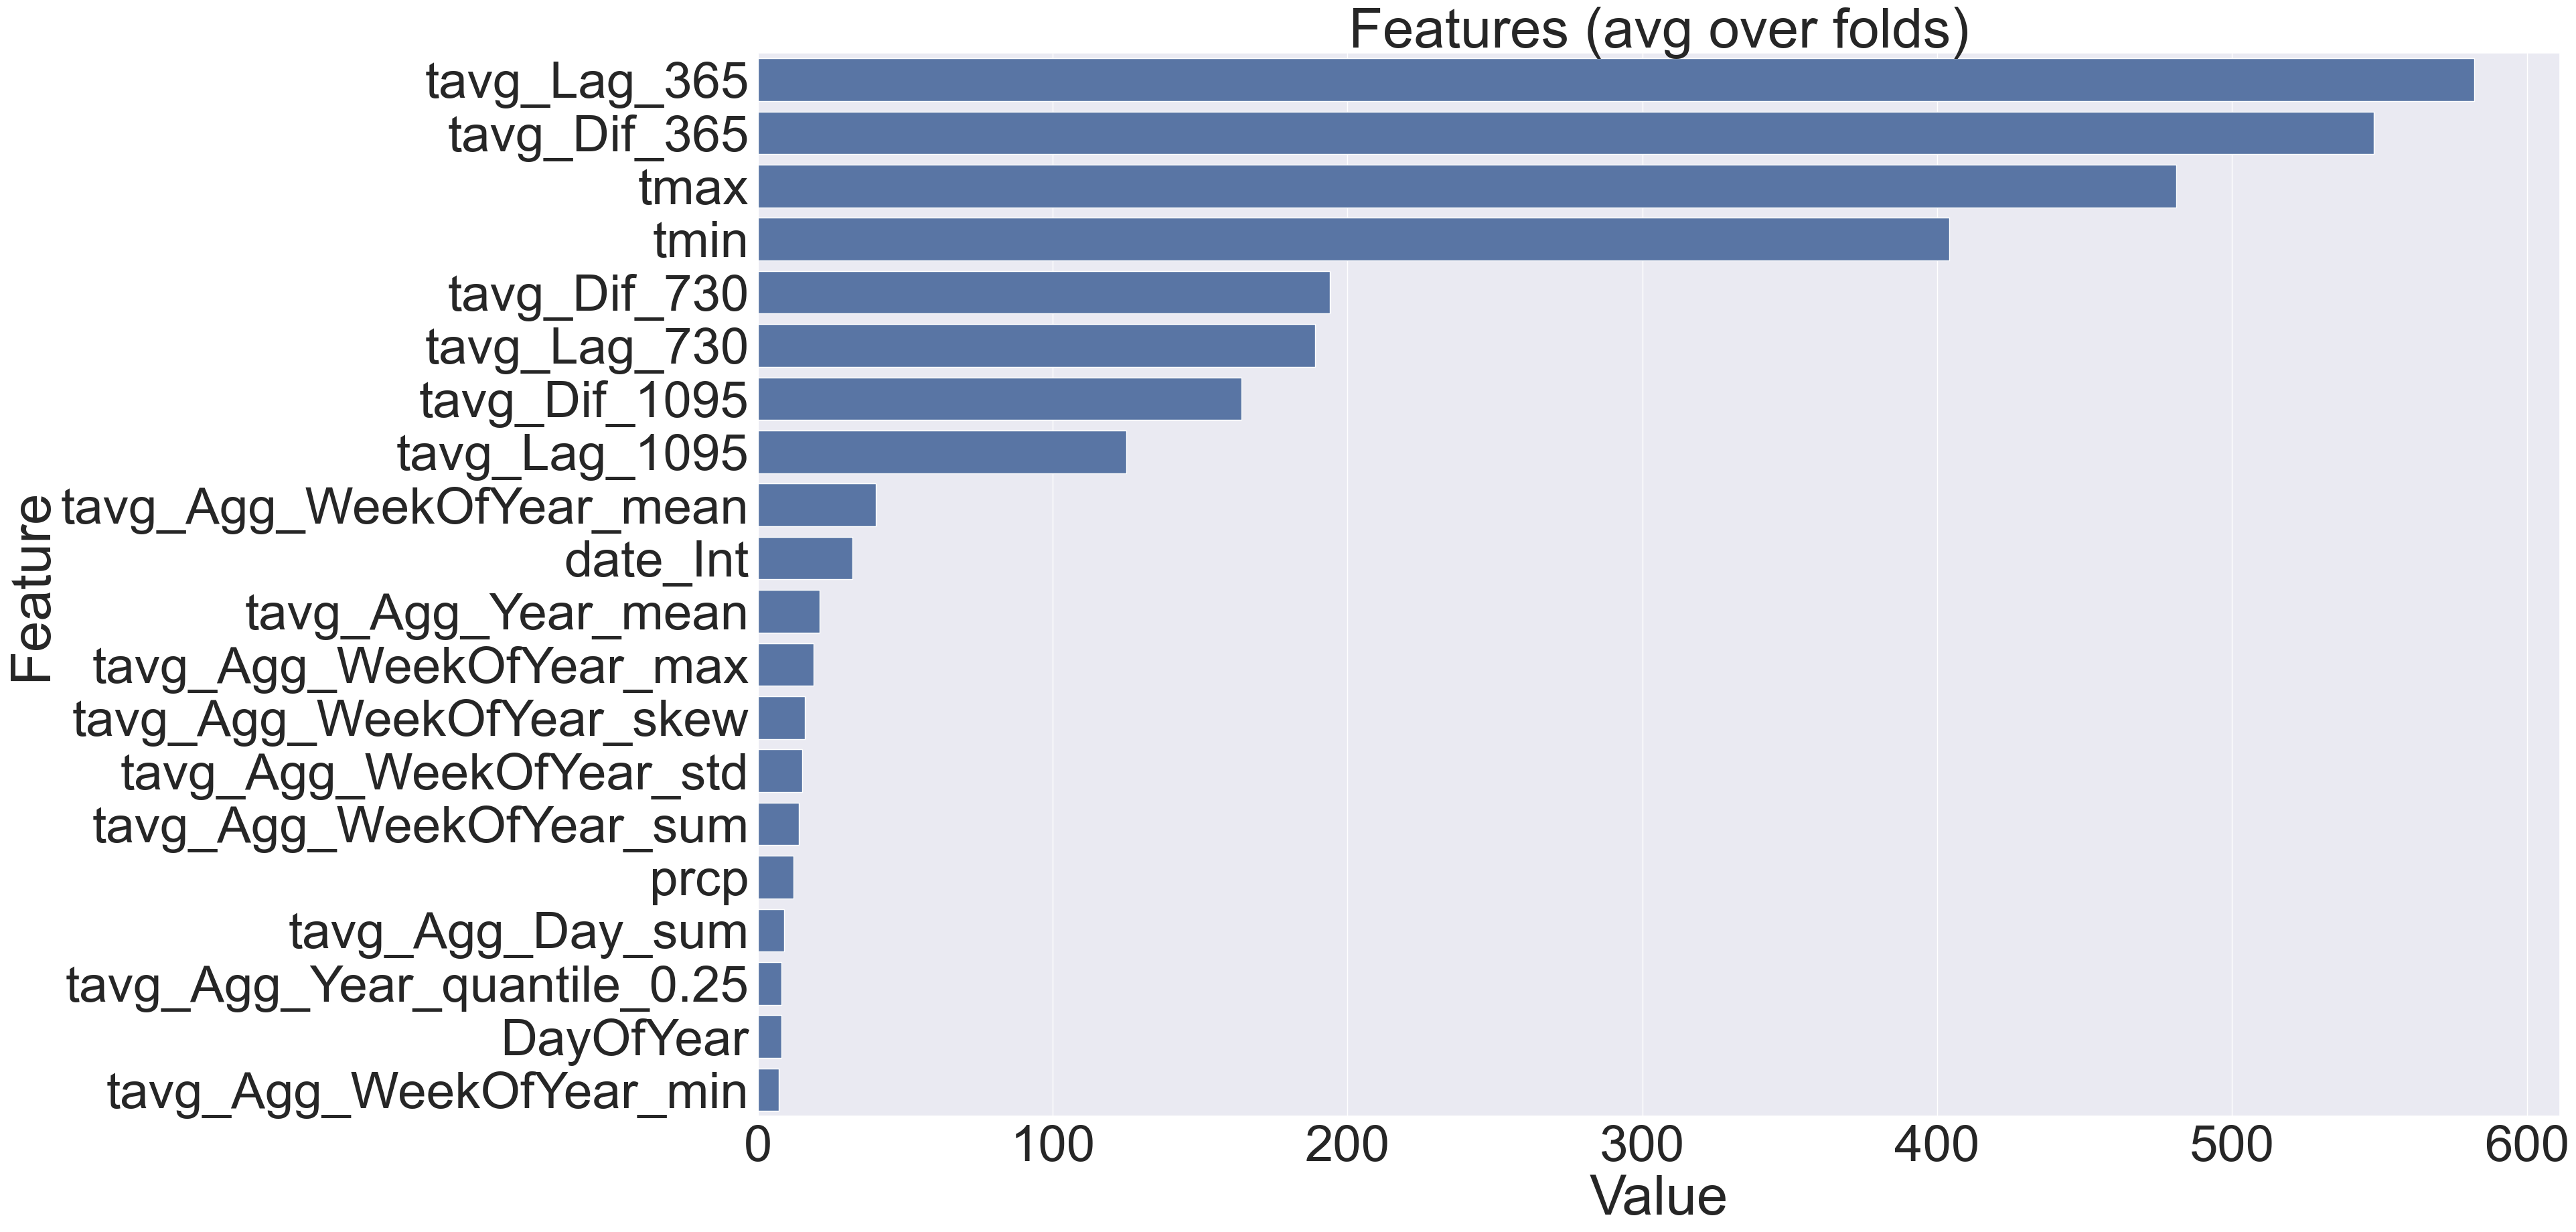

In [88]:
plotImp(lgbm,train_df.drop('tavg',axis=1))

## Evaluating Test Case

In [89]:
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Prepare the feature matrix X and target variables y1, y2, y3, y4 (prcp)
X_train = train_df1.drop(['tavg', 'tmin', 'tmax', 'prcp'], axis=1)
y_train = train_df1[['tavg', 'tmin', 'tmax', 'prcp']]  # Multiple targets as a DataFrame

# Initialize the LGBM model and wrap it with MultiOutputRegressor
lgbm = LGBMRegressor(max_depth=32, random_state=42)
multi_output_model = MultiOutputRegressor(lgbm)

# Fit the model
multi_output_model.fit(X_train, y_train)

# Prepare the test data
X_test = test_df1.drop(['tavg', 'tmin', 'tmax', 'prcp'], axis=1)

# Predict multiple targets: tavg, tmin, tmax, prcp
predictions = multi_output_model.predict(X_test)

# Separate the predictions
pred_tavg = predictions[:, 0]
pred_tmin = predictions[:, 1]
pred_tmax = predictions[:, 2]
pred_prcp = predictions[:, 3]

# Evaluation for tavg
print("Mean Absolute Error (tavg):", mean_absolute_error(test_df['tavg'], pred_tavg))
print("Mean Absolute Percentage Error (tavg):", mean_absolute_percentage_error(test_df['tavg'], pred_tavg))
print("Root Mean Squared Error (tavg):", np.sqrt(mean_squared_error(test_df['tavg'], pred_tavg)))

# Evaluation for tmin
print("Mean Absolute Error (tmin):", mean_absolute_error(test_df['tmin'], pred_tmin))
print("Mean Absolute Percentage Error (tmin):", mean_absolute_percentage_error(test_df['tmin'], pred_tmin))
print("Root Mean Squared Error (tmin):", np.sqrt(mean_squared_error(test_df['tmin'], pred_tmin)))

# Evaluation for tmax
print("Mean Absolute Error (tmax):", mean_absolute_error(test_df['tmax'], pred_tmax))
print("Mean Absolute Percentage Error (tmax):", mean_absolute_percentage_error(test_df['tmax'], pred_tmax))
print("Root Mean Squared Error (tmax):", np.sqrt(mean_squared_error(test_df['tmax'], pred_tmax)))

# Evaluation for prcp (precipitation)
print("Mean Absolute Error (prcp):", mean_absolute_error(test_df['prcp'], pred_prcp))
print("Mean Absolute Percentage Error (prcp):", mean_absolute_percentage_error(test_df['prcp'], pred_prcp))
print("Root Mean Squared Error (prcp):", np.sqrt(mean_squared_error(test_df['prcp'], pred_prcp)))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 12183, number of used features: 8
[LightGBM] [Info] Start training from score 28.490187
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 12183, number of used features: 8
[LightGBM] [Info] Start training from score 24.365029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 1

In [90]:
pred_df = test_df1.copy()

pred_df['p_tavg'] = pred_tavg
pred_df['p_tmin'] = pred_tmin
pred_df['p_tmax'] = pred_tmax
pred_df['p_prcp'] = pred_prcp


print(pred_df[['tavg','tmax','tmin','prcp','p_tavg','p_tmin','p_tmax','p_prcp']])


            tavg  tmax  tmin  prcp     p_tavg     p_tmin     p_tmax    p_prcp
time                                                                         
2023-05-11  31.1  35.1  28.0   0.0  30.708872  27.195835  34.776975  2.240952
2023-05-12  32.4  37.3  29.0   0.0  30.780072  27.195835  35.012870  2.240952
2023-05-13  33.4  38.0  29.8   0.0  30.752409  27.195835  35.162752  2.240952
2023-05-14  34.6  40.0  31.0   0.0  30.803441  27.189337  35.162752  1.971619
2023-05-15  33.8  39.0  30.0   0.0  30.697717  27.209242  35.160942  1.900033
...          ...   ...   ...   ...        ...        ...        ...       ...
2024-09-17  32.5  38.0  29.0   0.1  30.436368  26.987394  34.436048  4.194381
2024-09-18  32.0  36.0  29.0   1.5  30.433682  26.987394  34.498124  4.475571
2024-09-19  30.8  34.0  28.0   0.9  30.456951  26.987394  34.498124  6.506826
2024-09-20  32.2  38.0  29.0   0.3  30.473240  27.090919  34.498124  6.121669
2024-09-21  28.9  34.0  26.0   4.5  30.527803  27.209834  34.498

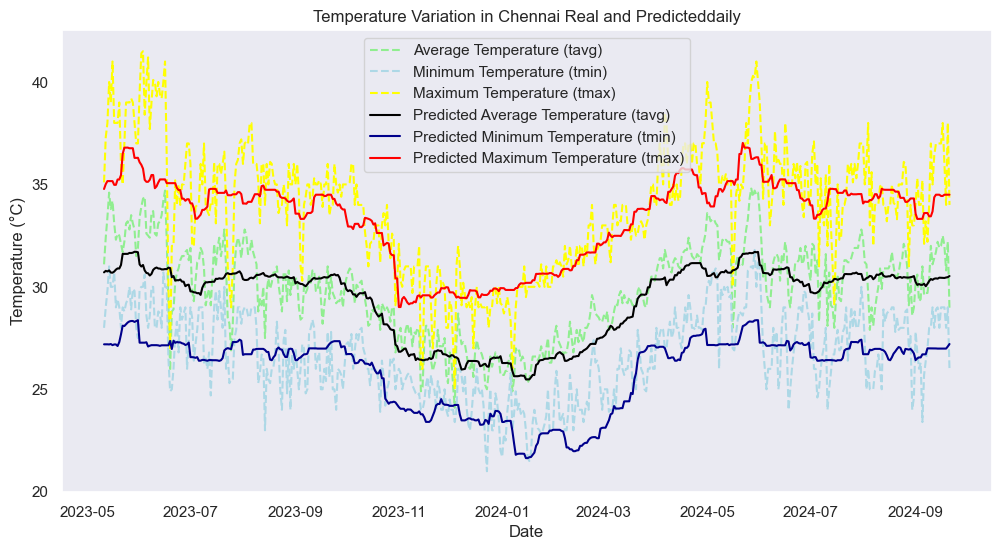

In [91]:
predicted_temperature_plot(pred_df, "daily")